<h1 align="center">Using Maching Learning for Credit Card Fraud Detection - A Springboard Capstone Project</h1> 

   ___________________ 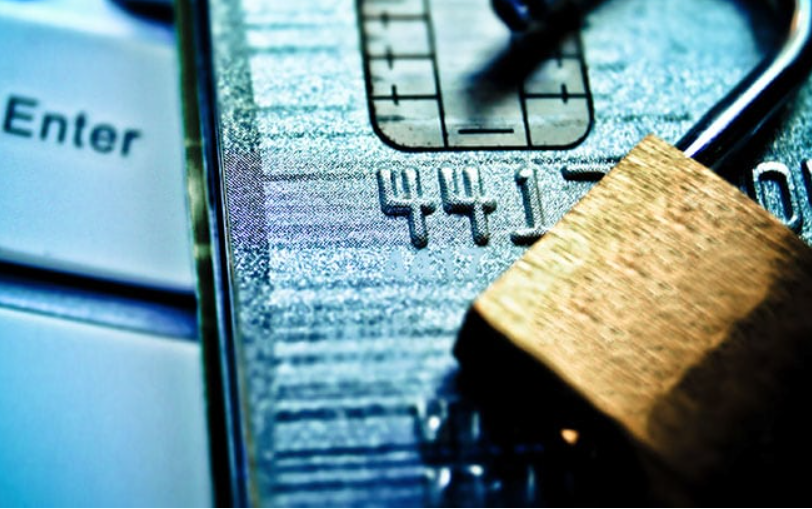

### Loading libraries 

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImPipline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Reading data 

In [6]:
trans_data = pd.read_csv(r'C:\Users\bkt29\OneDrive\Desktop\MLE_AI\datasets\card_transdata.csv')

##### Description

This dataset captures transaction patterns and behaviors that could indicate potential fraud in card transactions. The data is composed of several features designed to reflect the transactional context such as geographical location, transaction medium, and spending behavior relative to the user's history.

##### Origin

Credit_Card_Fraud_: https://www.openml.org/search?type=data&status=active&id=45955&sort=runs 

card_transdata.csv: https://github.com/Baz177/capstone_project/blob/main/card_transdata.csv 

In [9]:
trans_data.head()

,distace_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [10]:
trans_data.tail() 

,distace_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0
999999,58.108125,0.318110,0.386920,1,1,0,1,0


In [11]:
trans_data.shape

(1000000, 8)

### Data Wrangling

##### Transforming raw data into a more suitable format for analysis or machine learning

In [14]:
trans_data.isnull().sum() 

distace_from_home                 0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

##### No missing data

In [16]:
trans_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distace_from_home               1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [17]:
trans_data.describe()

,distace_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
trans_data.duplicated().sum()

0

##### No duplicates

### Data Exploration

<Axes: >

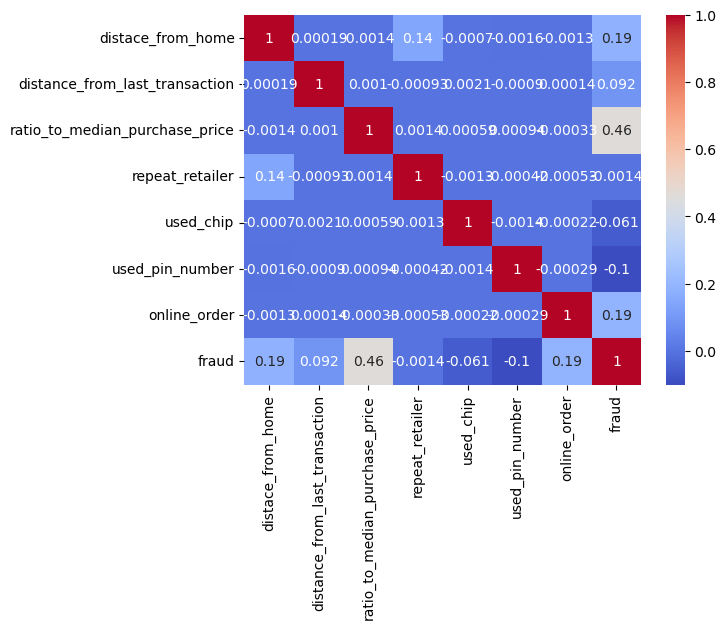

In [21]:
corr = trans_data.corr() 
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

**There seems to be a slight relationship between 'ratio_to_median_purchase_price' and 'Fraud'.**

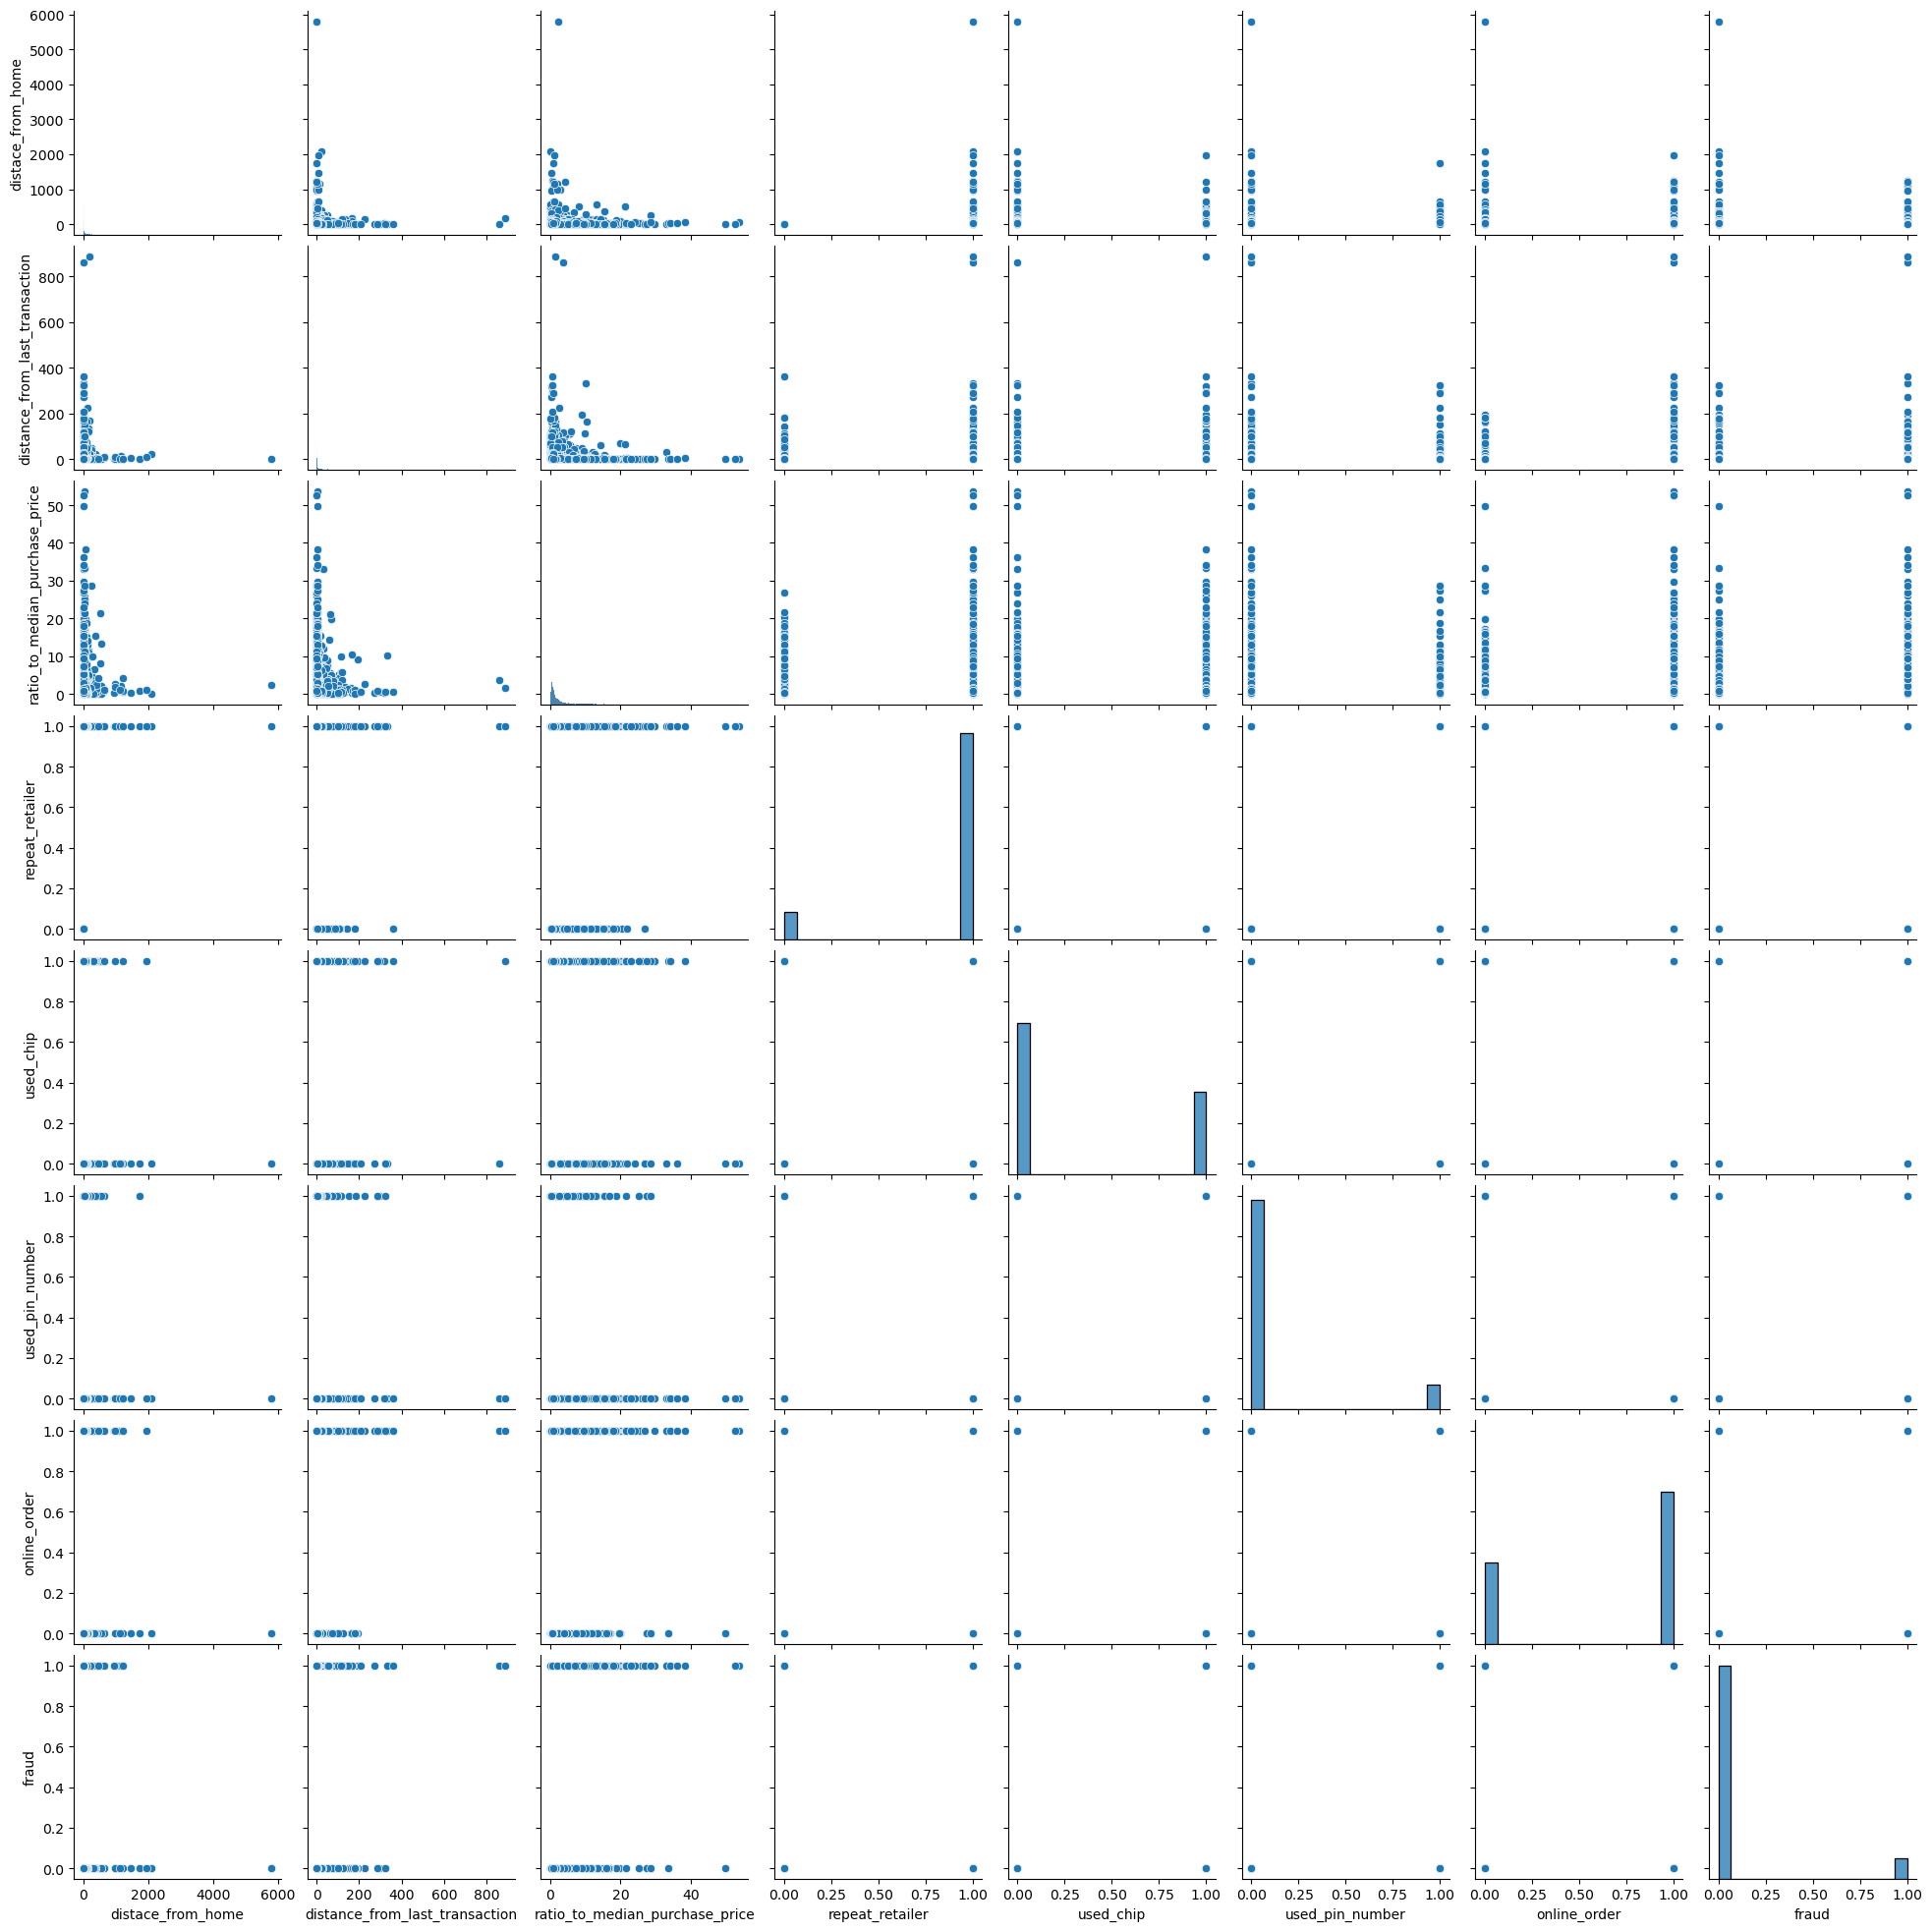

In [23]:
sns.pairplot(trans_data.sample(10000))
plt.show() 

### Outlier Detection and Removal

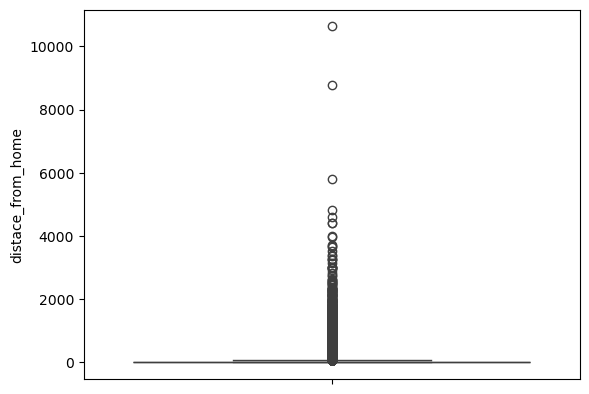

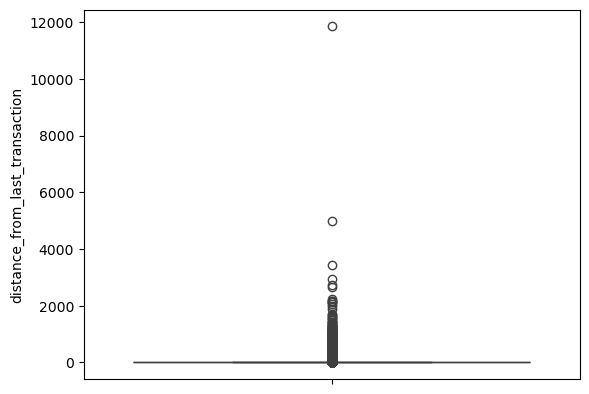

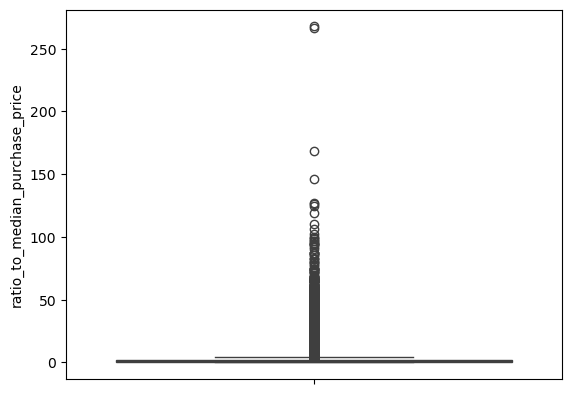

In [25]:
for col in ['distace_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']: 
    sns.boxplot(trans_data[col]) 
    plt.show() 

In [26]:
#Function to remove outliers
def rem_outliers(df, col): 
    """function to remove outliers""" 
    
    #percentiles
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 

    #IQR 
    IQR = Q3 - Q1 

    #Define Lower and Upper bounds
    lower_bound = Q1 - 1.5*IQR 
    upper_bound = Q3 + 1.5*IQR 

    df[col] = df[col].clip(lower = lower_bound, upper = upper_bound) 

    return df 

In [27]:
df_2 = rem_outliers(trans_data, 'distace_from_home') 
df_1 = rem_outliers(trans_data, 'distance_from_last_transaction')
df = rem_outliers(trans_data, 'ratio_to_median_purchase_price') 

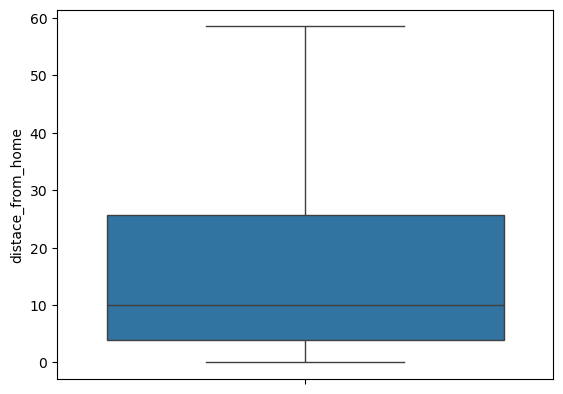

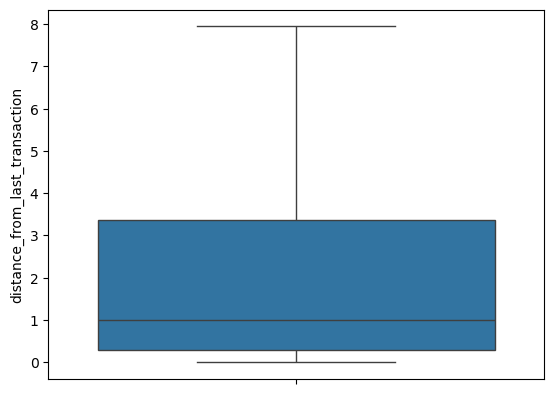

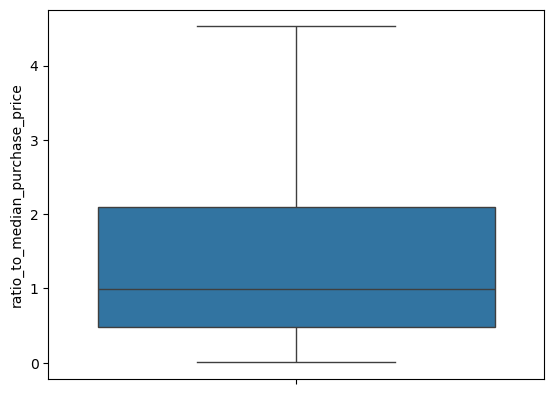

In [28]:
for col in ['distace_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']: 
    sns.boxplot(df[col]) 
    plt.show() 

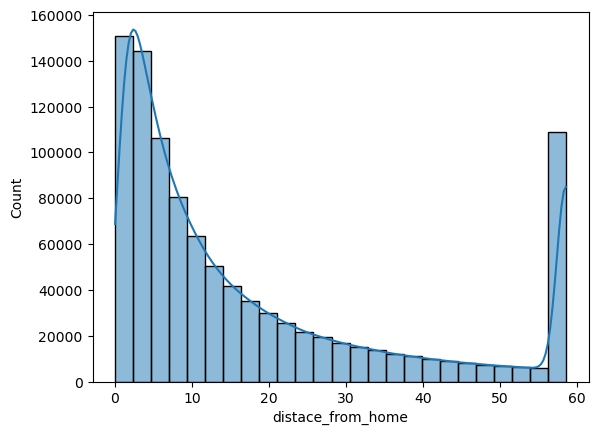

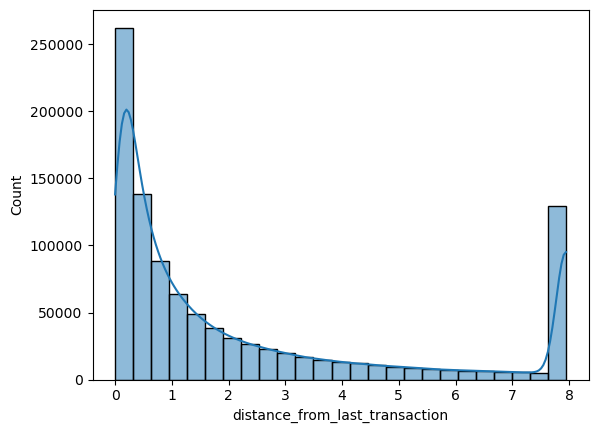

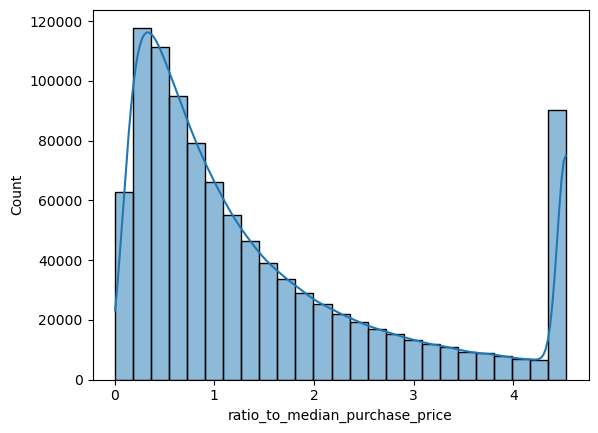

In [29]:
for col in ['distace_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']: 
    sns.histplot(x = df[col], bins = 25, kde = True, legend = False) 
    plt.show() 

**Alot of transactions occured far away from home or from last transaction site and they were relatively large** 

### Checking Data Balance 

<Axes: xlabel='fraud'>

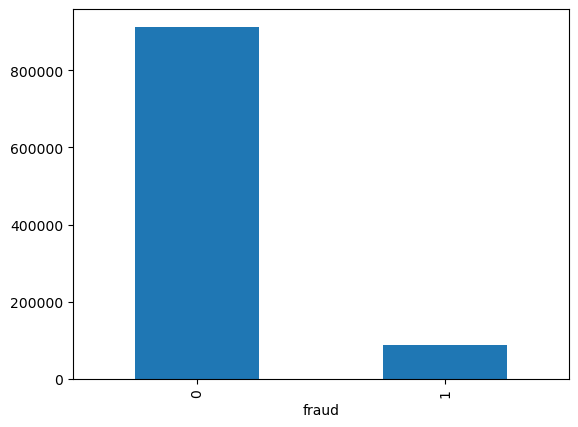

In [32]:
df['fraud'].value_counts().plot(kind = 'bar')

**Data is imbalanced**

### Splitting and Balancing Data 

In [35]:
#Creating X and Y
X = df.drop(columns = 'fraud', axis = 1) 
y = df['fraud'] 

In [36]:
#Using SMOTE (Oversampling) to balance data.  
smote = SMOTE(sampling_strategy = 'auto', random_state = 10, k_neighbors = 4) 

In [37]:
X_oversampled, y_oversampled = smote.fit_resample(X, y) 

In [38]:
X_oversampled.shape, y_oversampled.shape

((1825194, 7), (1825194,))

In [39]:
y_oversampled.value_counts()

fraud
0    912597
1    912597
Name: count, dtype: int64

In [40]:
#Splitting data to be used in model
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=10)

### Creating a Baseline Model 

In [42]:
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [44]:
accuracy_score(y_test, base_model.predict(X_test)) 

0.9705017820013752

In [53]:
print(classification_report(y_test, base_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    182525
           1       0.97      0.97      0.97    182514

    accuracy                           0.97    365039
   macro avg       0.97      0.97      0.97    365039
weighted avg       0.97      0.97      0.97    365039

